# 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# cd /content/drive/MyDrive/Colab_Notebooks

In [4]:
# set seed
np.random.seed(42) 

In [5]:
# 데이터셋 불러오기
df = pd.read_csv('./실전db.csv')
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [6]:
# 컬럼명 소문자로 변환
df= df.rename(columns=str.lower)
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [7]:
# 컬럼별 dtype 수정
df[['user_id', 'store_id']] = df[['user_id', 'store_id']].astype(object)
df[['join_date', 'date']] = df[['join_date', 'date']].apply(lambda X : pd.to_datetime(X))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     879271 non-null  object        
 1   join_date   879271 non-null  datetime64[ns]
 2   d_type      879271 non-null  object        
 3   store_id    879271 non-null  object        
 4   goods_type  879271 non-null  object        
 5   date        879271 non-null  datetime64[ns]
 6   count       879271 non-null  int64         
 7   ad1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 53.7+ MB


In [7]:
# 데이터 요약
df.describe()

,count
count,879271.000000
mean,1.029079
std,0.512428
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,61.000000


In [8]:
df.describe(include = 'O')

,user_id,d_type,store_id,goods_type,ad1
count,879271,879271,879271,879271,879271
unique,165425,3,1061,4,85
top,999665,AA,220557,A,J
freq,366,493166,17617,609790,179383


In [9]:
for col in df.columns:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].nunique()}")
    print()

Column명: user_id
Unique값: 165425

Column명: join_date
Unique값: 2352

Column명: d_type
Unique값: 3

Column명: store_id
Unique값: 1061

Column명: goods_type
Unique값: 4

Column명: date
Unique값: 366

Column명: count
Unique값: 56

Column명: ad1
Unique값: 85



In [10]:
for col in df[['d_type', 'goods_type', 'ad1']]:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].unique()}")
    print()

Column명: d_type
Unique값: ['AA' 'BB' 'CC']

Column명: goods_type
Unique값: ['A' 'C' 'B' 'D']

Column명: ad1
Unique값: ['GN' 'J' 'SC' 'MP' 'JRR' 'YD' 'GJ' 'YO' 'GSN' 'GBC' 'BF' 'DJ' '0' 'CD'
 'NO' 'CY' 'YC' 'SD' 'GD' 'GSW' 'DM' 'R' 'GB' 'GS' 'GHN' 'SB' 'IND' 'P'
 'GW' 'JR' 'GEJ' 'GGY' 'GKP' 'CAS' 'SG' 'BJG' 'BHW' 'GAY' 'GYI' 'CCA'
 'PJP' 'GGC' 'IYS' 'DB' 'GGM' 'GAS' 'WOID' 'DIV' 'AOI' 'COI' 'GPJ' 'SOI'
 'ABP' 'DOI' 'WF' 'BI' 'ZP' 'EP' 'Q' 'BO' 'ZE' 'RRR' 'QGI' 'DSO' 'SOD'
 'BOI' 'WT' 'BP' 'SP' 'CN' 'SJV' 'SDU' 'QH' 'BUD' 'CU' 'VU' 'WAE' 'NW'
 'DY' 'WH' 'GR' 'X' 'CVB' 'ADS' 'VO']



In [11]:
# 결측치 확인
df.isnull().sum()

user_id       0
join_date     0
d_type        0
store_id      0
goods_type    0
date          0
count         0
ad1           0
dtype: int64

# 필요 컬럼 추가

In [8]:
df['join_yearmonth'] = df['join_date'].dt.year.astype(str) + '-' + df['join_date'].dt.month.astype(str)
df['pay_yearmonth'] = df['date'].dt.year.astype(str) + '-' + df['date'].dt.month.astype(str)
df['pay_dow'] = df['date'].dt.day_name()
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-1,2020-1,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2020-1,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-1,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-1,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020-12,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020-12,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020-12,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020-12,Thursday


# 컬럼별 EDA

## user_id(유저) 기준

In [13]:
# user_id 999665의 연간 결제횟수 7919건
df_user = df.groupby('user_id')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_user

,user_id,count
44115,999665,7919
100781,1514190,284
16448,591610,245
90227,1467323,239
76230,1355841,235
...,...,...
45671,1023974,1
110166,1551355,1
45674,1024027,1
45676,1024047,1


In [14]:
# 매일 사용내역이 여러건 조회됨. 직원 공용 아이디인지?
df[df['user_id']==999665]

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,2018-12,2020-1,Wednesday
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,2018-12,2020-1,Thursday
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,2018-12,2020-1,Friday
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,2018-12,2020-1,Saturday
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN,2018-12,2020-1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,2018-12,2020-12,Sunday
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,2018-12,2020-12,Monday
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,2018-12,2020-12,Tuesday
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,2018-12,2020-12,Wednesday


In [9]:
# 이상치로 판단하여 제거하고 진행
df = df[df['user_id'] != 999665]
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-1,2020-1,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2020-1,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-1,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-1,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020-12,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020-12,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020-12,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020-12,Thursday


In [11]:
df_user = df.groupby('user_id')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_user

,user_id,count
100780,1514190,284
16448,591610,245
90226,1467323,239
76229,1355841,235
62808,1224426,223
...,...,...
81384,1402020,1
81383,1402008,1
81382,1401999,1
81379,1401974,1


<AxesSubplot:>

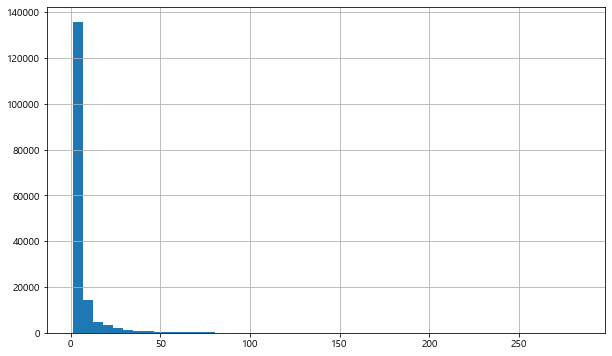

In [17]:
df_user['count'].hist(bins = 50, figsize=(10,6))

In [18]:
df_user[df_user['count']==1]

,user_id,count
164292,1820269,1
157303,1773327,1
164212,1819760,1
157021,1771732,1
156988,1771579,1
...,...,...
81384,1402020,1
81383,1402008,1
81382,1401999,1
81379,1401974,1


In [19]:
# 전체 유저의 44.7%는 사용 이력이 1회
len(df_user.loc[df_user['count']==1, 'user_id'].to_list()) / df_user.shape[0] * 100

44.701494341812555

In [12]:
# 사용 이력이 1회인 유저 onetime_user_list에 저장 
onetime_user_list = df_user.loc[df_user['count']==1, 'user_id'].to_list()

## join_date(가입일) 기준

In [13]:
# 가입일이 1970-01-01인 데이터 1093건
df_join_date = df.groupby('join_date')['count'].agg(['count','sum']).reset_index()
df_join_date

,join_date,count,sum
0,1970-01-01,1093,1119
1,2013-12-16,2,2
2,2013-12-17,26,27
3,2013-12-18,1,1
4,2013-12-21,2,2
...,...,...,...
2347,2020-12-27,102,105
2348,2020-12-28,135,140
2349,2020-12-29,115,117
2350,2020-12-30,106,108


In [14]:
# 가입시 시스템상의 오류로 해당 날짜가 들어간 것으로 보임
# 정확한 join_date를 알 수 없으므로 해당 데이터 제거
df = df[~(df['join_date']=='1970-01-01')]
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-1,2020-1,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2020-1,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-1,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-1,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020-12,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020-12,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020-12,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020-12,Thursday


In [23]:
df_join_date = df.groupby('join_date')['count', 'join_yearmonth'].agg({
    'count' : 'sum', 'join_yearmonth' : 'max'}).reset_index()
df_join_date

<ipython-input-23-7fa97c47c621>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_join_date = df.groupby('join_date')['count', 'join_yearmonth'].agg({


,join_date,count,join_yearmonth
0,2013-12-16,2,2013-12
1,2013-12-17,27,2013-12
2,2013-12-18,1,2013-12
3,2013-12-21,2,2013-12
4,2013-12-22,2,2013-12
...,...,...,...
2346,2020-12-27,105,2020-12
2347,2020-12-28,140,2020-12
2348,2020-12-29,117,2020-12
2349,2020-12-30,108,2020-12


<AxesSubplot:xlabel='join_yearmonth', ylabel='count'>

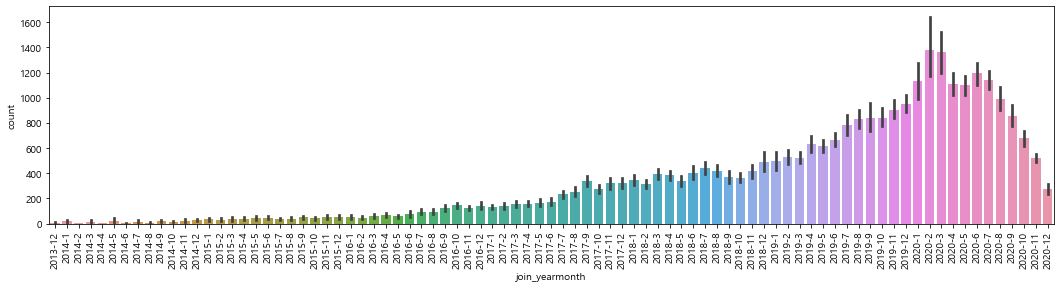

In [24]:
# 2020년 사용자의 가입연월 분포
plt.figure(figsize = (18,4))
plt.xticks(rotation = 90)
sns.barplot(x = df_join_date['join_yearmonth'], y = df_join_date['count'])

## date(사용일) 기준

In [25]:
df_date = df.groupby('date')['count', 'pay_yearmonth'].agg({
    'count' : 'sum', 'pay_yearmonth' : 'max'}).reset_index()
df_date

<ipython-input-25-ba4d8eac5e68>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_date = df.groupby('date')['count', 'pay_yearmonth'].agg({


,date,count,pay_yearmonth
0,2020-01-01,928,2020-1
1,2020-01-02,1505,2020-1
2,2020-01-03,1747,2020-1
3,2020-01-04,2213,2020-1
4,2020-01-05,1515,2020-1
...,...,...,...
361,2020-12-27,1290,2020-12
362,2020-12-28,2773,2020-12
363,2020-12-29,2802,2020-12
364,2020-12-30,2879,2020-12


<AxesSubplot:xlabel='pay_yearmonth', ylabel='count'>

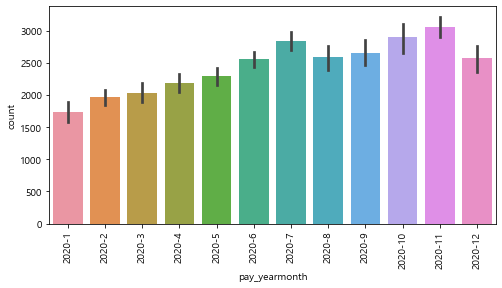

In [26]:
# 2020년 결제건수 분포
# 2020년에는 지속적으로 결제건수가 증가하는 추세에서 8,9,12월은 감소하였음
plt.figure(figsize = (8,4))
plt.xticks(rotation = 90)
sns.barplot(x = df_date['pay_yearmonth'], y = df_date['count'])

## store_id 기준

In [27]:
# 총 1060개의 store_id
df_store_id = df.groupby('store_id')['count'].sum().reset_index().sort_values(by = 'count',ascending = False)
df_store_id

,store_id,count
513,220557,17761
611,220893,17527
532,220655,16780
602,220848,16287
142,92437,16266
...,...,...
930,230196,1
926,230190,1
463,220018,1
922,228955,1


In [28]:
# 결제가 많았던 top 20개 store_id 대상으로 추가 분석
df_store_id_list = df_store_id.head(20)['store_id'].tolist()
df_store_id_list

[220557,
 220893,
 220655,
 220848,
 92437,
 105033,
 91853,
 1109,
 82400,
 109037,
 173268,
 220836,
 220745,
 182296,
 220897,
 221045,
 28018,
 109557,
 90542,
 109400]

In [29]:
top_stores = df[df['store_id'].isin(df_store_id_list)].groupby(['store_id','d_type','goods_type','ad1'])['count'].count().reset_index()
top_stores

,store_id,d_type,goods_type,ad1,count
0,1109,AA,A,JRR,7720
1,1109,AA,D,JRR,750
2,1109,BB,A,JRR,5064
3,1109,BB,D,JRR,494
4,28018,AA,B,JRR,663
...,...,...,...,...,...
93,221045,AA,A,GN,4555
94,221045,AA,B,GN,682
95,221045,BB,A,GN,3404
96,221045,BB,B,GN,534


<AxesSubplot:xlabel='d_type', ylabel='count'>

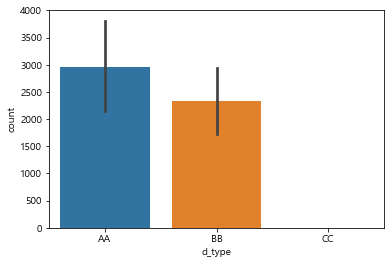

In [30]:
# top 20 store의 d_type은 AA가 가장 많고 CC가 가장 적음
plt.figure(figsize = (6,4))
sns.barplot(x = top_stores['d_type'], y = top_stores['count'])

<AxesSubplot:xlabel='goods_type', ylabel='count'>

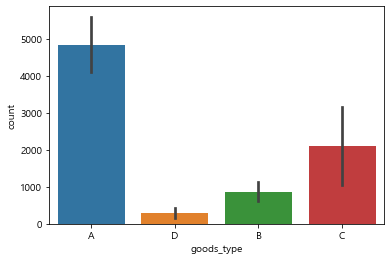

In [31]:
# top 20 store의 goods_type은 A가 가장 많고 D가 가장 적음
plt.figure(figsize = (6,4))
sns.barplot(x = top_stores['goods_type'], y = top_stores['count'])

<AxesSubplot:xlabel='ad1', ylabel='count'>

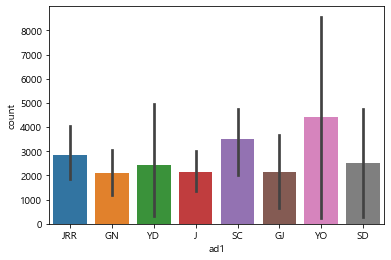

In [34]:
# top 20 store의 goods_type은 CY가 가장 많음
plt.figure(figsize = (6,4))
sns.barplot(x = top_stores['ad1'], y = top_stores['count'])

## dtype 기준

In [35]:
df_dtype = df.groupby('d_type')['count'].sum().reset_index()
df_dtype

,d_type,count
0,AA,503976
1,BB,391700
2,CC,125


<AxesSubplot:xlabel='d_type', ylabel='count'>

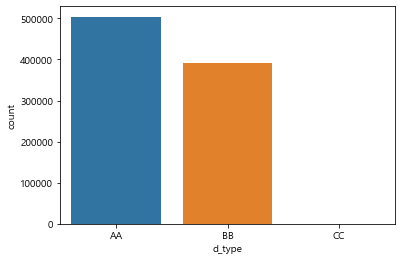

In [36]:
# AA 타입이 가장 높은 비율을 차지
plt.figure(figsize = (6,4))
sns.barplot(x = df_dtype['d_type'], y = df_dtype['count'])

## goods_type 기준

In [37]:
df_goods = df.groupby('goods_type')['count'].sum().reset_index()
df_goods

,goods_type,count
0,A,620972
1,B,120145
2,C,134451
3,D,20233


<AxesSubplot:xlabel='goods_type', ylabel='count'>

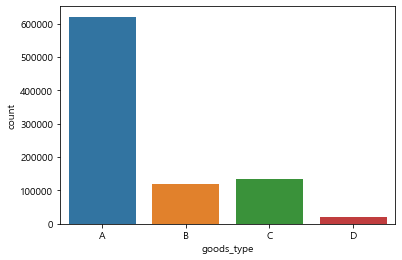

In [38]:
# A 타입이 가장 높은 비율을 차지
plt.figure(figsize = (6,4))
sns.barplot(x = df_goods['goods_type'], y = df_goods['count'])

## ad1 기준

In [39]:
df_ad1 = df.groupby('ad1')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_ad1

,ad1,count
49,J,182586
39,GN,176688
51,JRR,129363
63,SC,77162
52,MP,68766
...,...,...
71,VO,1
54,NW,1
76,WOID,1
41,GR,1


<AxesSubplot:xlabel='ad1', ylabel='count'>

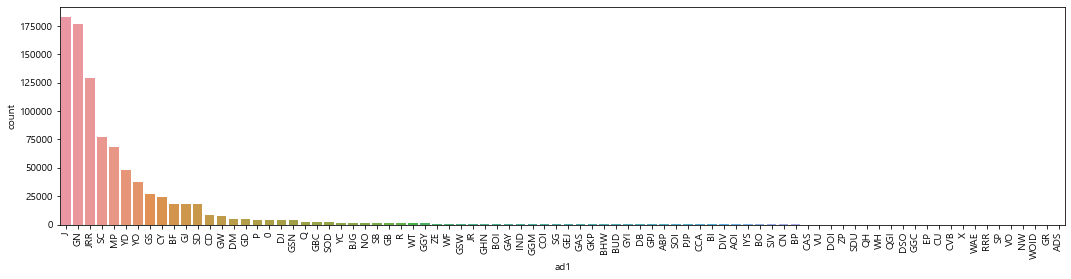

In [40]:
# G, GN이 가장 많은 비율을 차지 -> 행정구역을 나타내는 표기일지?
plt.figure(figsize = (18,4))
plt.xticks(rotation = 90)
sns.barplot(x = df_ad1['ad1'], y = df_ad1['count'], order = df_ad1['ad1'])

## dayofweek(요일) 기준

In [41]:
df_dow = df.groupby('pay_dow')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_dow

,pay_dow,count
0,Friday,140413
4,Thursday,135969
6,Wednesday,134749
2,Saturday,134345
5,Tuesday,133089
1,Monday,129300
3,Sunday,87936


<AxesSubplot:xlabel='pay_dow', ylabel='count'>

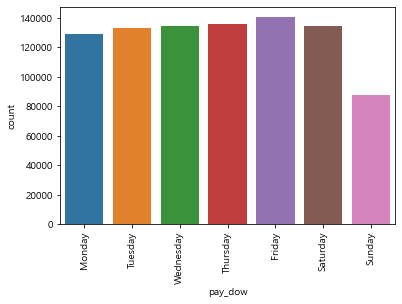

In [42]:
# 요일별 이용자수 : 목~금요일이 가장 많으며, 일요일이 가장 적음
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = df_dow['pay_dow'], y = df_dow['count'], order = dow_order)

# 심층 EDA


## top users
- 결제건수 상위 20명 유저를 대상으로 컬럼별 특징 살펴보기

In [43]:
# 결제건수 상위 20명 유저
top_users_list = df_user['user_id'].head(20).unique()
top_users_list

array([1514190,  591610, 1467323, 1355841, 1224426, 1365069, 1407916,
       1284291, 1144500,  909315, 1504815, 1201981,  571472,  612237,
       1532535,  640247, 1303371, 1318771,  603013,  812843], dtype=int64)

In [44]:
top_users = df[df['user_id'].isin(top_users_list)].sort_values(by = 'user_id').reset_index()
top_users

,index,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,201736,571472,2017-08-03,AA,92437,B,2020-04-16,1,J,2017-8,2020-4,Thursday
1,396617,571472,2017-08-03,AA,92437,B,2020-07-07,1,J,2017-8,2020-7,Tuesday
2,47103,571472,2017-08-03,AA,92437,B,2020-01-29,1,J,2017-8,2020-1,Wednesday
3,399238,571472,2017-08-03,AA,92437,B,2020-07-08,1,J,2017-8,2020-7,Wednesday
4,401921,571472,2017-08-03,AA,92437,B,2020-07-09,1,J,2017-8,2020-7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
3831,374559,1532535,2020-03-31,BB,219913,A,2020-06-28,1,GN,2020-3,2020-6,Sunday
3832,691068,1532535,2020-03-31,BB,219913,A,2020-10-25,1,GN,2020-3,2020-10,Sunday
3833,688109,1532535,2020-03-31,BB,219913,A,2020-10-24,1,GN,2020-3,2020-10,Saturday
3834,360975,1532535,2020-03-31,BB,219913,B,2020-06-23,1,GN,2020-3,2020-6,Tuesday


In [45]:
# dtype : 각 유저당 하나의 dtype을 가짐
# 결제수단일 것으로 추정됨
for user in top_users_list:
  df_top = top_users.copy()
  d_type = df_top[df_top['user_id'] == user]['d_type'].unique()
  print(d_type)

['AA']
['AA']
['AA']
['AA']
['BB']
['AA']
['AA']
['AA']
['AA']
['BB']
['AA']
['BB']
['AA']
['AA']
['BB']
['BB']
['AA']
['AA']
['AA']
['AA']


In [46]:
# goods_type : 유저마다 다양한 goods_type 정보를 가짐
# 구매한 티켓 종류일 것으로 추정됨 (1일권, 3시간권 등)
for user in top_users_list:
  df_top = top_users.copy()
  inputs = df_top[df_top['user_id'] == user]['goods_type'].unique()
  print(inputs)

['A' 'B' 'C']
['A' 'C']
['B' 'A']
['A']
['A' 'B']
['A']
['A' 'B' 'D' 'C']
['A' 'B' 'C']
['A']
['A']
['A']
['A']
['B' 'A' 'C']
['A']
['A' 'B']
['A' 'C']
['A' 'D']
['A' 'D']
['A' 'B']
['C' 'A']


In [47]:
# ad1 : 유저마다 다양한 ad1 정보를 가짐
# 지역 분류일 것으로 추정됨
for user in top_users_list:
  df_top = top_users.copy()
  inputs = df_top[df_top['user_id'] == user]['ad1'].unique()
  print(inputs)

['GN' 'GS']
['JRR']
['JRR']
['GJ']
['J' 'YO']
['GJ']
['J' 'JRR']
['GJ' 'MP' 'JRR']
['JRR']
['SC']
['GN']
['GN']
['J' 'JRR' 'SD']
['MP']
['GN']
['CY']
['JRR']
['CY']
['JRR']
['GN' 'J']


## top stores
- 결제건수 상위 20개 store 대상으로 컬럼별 특징 살펴보기

In [48]:
# 결제건수 상위 20개 store
top_stores_list = df.groupby('store_id')['count'].sum().sort_values(ascending = False).reset_index().head(20)['store_id'].tolist()
top_stores_list

[220557,
 220893,
 220655,
 220848,
 92437,
 105033,
 91853,
 1109,
 82400,
 109037,
 173268,
 220836,
 220745,
 182296,
 220897,
 221045,
 28018,
 109557,
 90542,
 109400]

In [49]:
top_stores = df[df['store_id'].isin(top_stores_list)].sort_values(by = 'store_id').reset_index()
top_stores

,index,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,163742,808942,2018-05-19,AA,1109,A,2020-03-28,1,JRR,2018-5,2020-3,Saturday
1,197157,1521496,2020-03-16,BB,1109,A,2020-04-13,1,JRR,2020-3,2020-4,Monday
2,232431,1328034,2019-09-27,BB,1109,A,2020-04-29,1,JRR,2019-9,2020-4,Wednesday
3,103671,963885,2018-11-09,AA,1109,A,2020-02-27,1,JRR,2018-11,2020-2,Thursday
4,419934,1547229,2020-04-21,AA,1109,D,2020-07-15,1,JRR,2020-4,2020-7,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
246257,551760,1230094,2019-07-10,AA,221045,A,2020-09-03,1,GN,2019-7,2020-9,Thursday
246258,414586,1555305,2020-04-30,AA,221045,A,2020-07-13,1,GN,2020-4,2020-7,Monday
246259,279138,1050432,2019-01-29,AA,221045,B,2020-05-21,1,GN,2019-1,2020-5,Thursday
246260,414686,1573166,2020-05-19,AA,221045,A,2020-07-13,1,GN,2020-5,2020-7,Monday


In [50]:
# dtype : 스토어마다 다양한 dtype 정보를 가짐
for store in top_stores_list:
  df_top = top_stores.copy()
  d_type = df_top[df_top['store_id'] == store]['d_type'].unique()
  print(d_type)

['AA' 'BB']
['BB' 'AA' 'CC']
['BB' 'AA']
['AA' 'BB' 'CC']
['AA' 'BB']
['AA' 'BB']
['BB' 'AA']
['AA' 'BB']
['AA' 'BB']
['BB' 'AA']
['BB' 'AA']
['AA' 'BB' 'CC']
['AA' 'BB']
['AA' 'BB']
['AA' 'BB']
['BB' 'AA' 'CC']
['BB' 'AA' 'CC']
['BB' 'AA']
['AA' 'BB']
['AA' 'BB']


In [51]:
# goods_type : 스토어마다 다양한 goods_type 정보를 가짐
for store in top_stores_list:
  df_top = top_stores.copy()
  goods_type = df_top[df_top['store_id'] == store]['goods_type'].unique()
  print(goods_type)

['A' 'D']
['A' 'C' 'B']
['A' 'B']
['C' 'B']
['B' 'A' 'C']
['A' 'B']
['A' 'D' 'B']
['A' 'D']
['A' 'B']
['A' 'B' 'D']
['A' 'D' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['C' 'B']
['B' 'A']
['A' 'B' 'D']
['C' 'B' 'A']


In [52]:
# ad1 : 각 스토어당 하나의 ad1 정보를 가짐
for store in top_stores_list:
  df_top = top_stores.copy()
  ad1 = df_top[df_top['store_id'] == store]['ad1'].unique()
  print(ad1)

['YO']
['J']
['JRR']
['GN']
['J']
['SC']
['YD']
['JRR']
['JRR']
['J']
['J']
['JRR']
['SD']
['SC']
['J']
['GN']
['JRR']
['GJ']
['GN']
['J']


# 모델을 통한 예측 - by rows

## 1회만 결제한 유저 제외

In [15]:
df_model = df[~df['user_id'].isin(onetime_user_list)]
df_model

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2020-1,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-1,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-1,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-1,Wednesday
5,45633,2015-01-04,BB,91885,A,2020-01-01,1,YD,2015-1,2020-1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
879165,1829325,2020-12-30,BB,102276,C,2020-12-31,2,SC,2020-12,2020-12,Thursday
879173,1829480,2020-12-30,AA,105033,A,2020-12-31,1,SC,2020-12,2020-12,Thursday
879176,1829513,2020-12-30,BB,182335,A,2020-12-31,1,SC,2020-12,2020-12,Thursday
879184,1829632,2020-12-30,AA,220836,A,2020-12-31,1,JRR,2020-12,2020-12,Thursday


## train, test set 나누기

In [60]:
# train set (2020-01 ~ 2020-09)
df_train = df_model[df_model['join_date'] <= '2020-09-30']
df_train

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2020-1,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-1,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-1,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-1,Wednesday
5,45633,2015-01-04,BB,91885,A,2020-01-01,1,YD,2015-1,2020-1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
878542,1707873,2020-09-28,BB,190172,A,2020-12-31,1,YO,2020-9,2020-12,Thursday
878543,1707880,2020-09-28,AA,230213,A,2020-12-31,1,JRR,2020-9,2020-12,Thursday
878545,1708089,2020-09-29,AA,90545,A,2020-12-31,1,GN,2020-9,2020-12,Thursday
878546,1708309,2020-09-29,AA,106190,A,2020-12-31,1,YD,2020-9,2020-12,Thursday


In [77]:
train_data = df_train.drop('count', axis = 1)
train_label = df_train['count']

In [61]:
# test set (2020-10 ~ 2020-12) 
df_test = df_model[df_model['join_date'] > '2020-09-30']
df_test

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
624245,1710156,2020-10-01,AA,230871,A,2020-10-01,1,SC,2020-10,2020-10,Thursday
624258,1710283,2020-10-01,AA,82399,A,2020-10-01,1,JRR,2020-10,2020-10,Thursday
624261,1710293,2020-10-01,AA,223017,A,2020-10-01,1,GB,2020-10,2020-10,Thursday
624273,1710390,2020-10-01,BB,222401,A,2020-10-01,1,CY,2020-10,2020-10,Thursday
624286,1710476,2020-10-01,BB,92264,A,2020-10-01,1,JRR,2020-10,2020-10,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
879165,1829325,2020-12-30,BB,102276,C,2020-12-31,2,SC,2020-12,2020-12,Thursday
879173,1829480,2020-12-30,AA,105033,A,2020-12-31,1,SC,2020-12,2020-12,Thursday
879176,1829513,2020-12-30,BB,182335,A,2020-12-31,1,SC,2020-12,2020-12,Thursday
879184,1829632,2020-12-30,AA,220836,A,2020-12-31,1,JRR,2020-12,2020-12,Thursday


In [78]:
test_data = df_test.drop('count', axis = 1)
test_label = df_test['count']

In [40]:
# cat_columns, num_columns 구분
cat_columns = [c for c, t in zip(df_model.dtypes.index, df_model.dtypes) if t == 'O'] 
num_columns = [c for c in df_model.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n\n Other Columns: \n{num_columns}')

Categorical Columns: 
['user_id', 'd_type', 'store_id', 'goods_type', 'ad1', 'join_yearmonth', 'pay_yearmonth', 'pay_dow']

 Other Columns: 
['join_date', 'date', 'count']


## 전처리 함수

In [72]:
# # 원핫인코딩 전처리함수
# from sklearn.preprocessing import OneHotEncoder

# def onehotencoding(x_train, x_test):
#     tmp_x_train = x_train.copy()
#     tmp_x_test  = x_test.copy()
    
#     # reset index
#     tmp_x_train = tmp_x_train.reset_index(drop=True)
#     tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
#     # cat_columns 원핫인코딩
#     ohe = OneHotEncoder(sparse=False)
#     x_all = pd.concat([tmp_x_train[cat_columns], 
#                        tmp_x_test[cat_columns]], axis=0)

#     new_x_all = ohe.fit_transform(x_all)
    
#     ohe_columns = []
#     for cat in ohe.categories_:
#         ohe_columns += cat.tolist()
    
#     new_x_all = pd.DataFrame(new_x_all, columns=ohe_columns)

#     new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
#     new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]

#     new_x_train_cat = new_x_train_cat.reset_index(drop=True)
#     new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

#     tmp_x_train = tmp_x_train.drop(columns=cat_columns)
#     tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

#     tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
#     tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
#     return tmp_x_train, tmp_x_test

In [19]:
# 라벨인코딩 전처리함수
from sklearn.preprocessing import LabelEncoder

def labelencoding(x_train, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_test  = x_test.copy()
    
    # reset index
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)

    # cat_columns 라벨인코딩
    le = LabelEncoder()
    x_all = pd.concat([tmp_x_train[cat_columns], tmp_x_test[cat_columns]], axis=0)
    new_x_all = x_all.apply(LabelEncoder().fit_transform)
    
    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
    new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]

    new_x_train_cat = new_x_train_cat.reset_index(drop=True)
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_test

In [80]:
train_data_e, test_data_e = labelencoding(train_data, test_data)
train_data_final = train_data_e.drop(['join_date','date'], axis = 1)
test_data_final = test_data_e.drop(['join_date','date'], axis = 1)

In [90]:
train_data_final

,user_id,d_type,store_id,goods_type,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,20,1,312,0,48,5,0,6
1,233,1,74,0,62,3,0,6
2,269,1,16,2,51,4,0,6
3,278,0,539,2,50,4,0,6
4,355,1,119,0,78,13,0,6
...,...,...,...,...,...,...,...,...
772141,84443,1,349,0,79,84,3,4
772142,84444,0,903,0,50,84,3,4
772143,84466,0,98,0,39,84,3,4
772144,84483,0,194,0,78,84,3,4


In [89]:
test_data_final

,user_id,d_type,store_id,goods_type,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,84592,0,924,0,62,74,1,4
1,84596,0,66,0,50,74,1,4
2,84597,0,756,0,29,74,1,4
3,84602,1,734,0,19,74,1,4
4,84603,1,136,0,50,74,1,4
...,...,...,...,...,...,...,...,...
31869,91363,1,163,2,62,76,3,4
31870,91364,0,171,0,62,76,3,4
31871,91365,1,326,0,62,76,3,4
31872,91366,0,594,0,50,76,3,4


In [ ]:
# train_data_final : x_train
# train_label : y_train
# test_data_final : x_test
# test_label : y_test

## 모델 생성

In [88]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = [['RandomForest', RandomForestRegressor()], 
          ['XGBoost', XGBRegressor(n_jobs=-1)], 
          ['LightGBM', LGBMRegressor(n_jobs=-1)]]

best_loss = np.inf
for i, (name, model) in enumerate(models):
    model.fit(train_data_final, train_label)
    y_pred = model.predict(test_data_final)
    current_loss = mean_absolute_error(test_label, y_pred)
    
    if current_loss < best_loss:
        best_loss  = current_loss
        best_model = [i, name]
    
    print(f'{name} Model Mean Absolute Error: {best_loss}')
    
print(f'Best Model: {best_model[-1]}, MAE : {best_loss}')


RandomForest Model Mean Absolute Error: 0.20533568834030028
XGBoost Model Mean Absolute Error: 0.14840690977018225
LightGBM Model Mean Absolute Error: 0.06461163727788556
Best Model: LightGBM, MAE : 0.06461163727788556


In [94]:
mse = mean_squared_error(test_label, y_pred)
mse

0.06634175050571166